#  LIME [(Ribeiro .al 2016)](https://arxiv.org/abs/1602.04938)

本节课详细介绍： https://www.jiqizhixin.com/articles/2019-10-30-9

## Intuition
*Intuitively, an **explanation** is a **local linear approximation** of the **model's behaviour**. While the model may be very complex globally, it is easier to approximate it around the vicinity of a particular instance. While treating the model as a black box, we perturb the instance we want to explain and learn a sparse linear model around it, as an explanation*

直觉

直观上，解释是模型行为的局部线性近似。 虽然模型在全局范围内可能非常复杂，但在特定实例附近更容易对其进行近似。 在将模型视为黑盒的同时，我们扰乱了我们想要解释的实例，并在其周围学习了一个稀疏线性模型，作为解释

<p align="center">
<img src=https://raw.githubusercontent.com/marcotcr/lime/master/doc/images/lime.png width=400>
</p>

## Algorithm steps算法步骤 
The different steps computed by the algorithm are the following :

算法计算的不同步骤如下：
### 1. Creation of a neighbourhood around the instance1. 在实例周围创建一个邻域： : 
- Data samples are generated by applying perturbations around the instance following a normal distribution
- A weight is allocated to every sample with regard to its proximity to the instance. This is the crucial step. The instance explanations may differ a lot with regard to the kernel used to compute the weights. 2 variables are at stake here, the kernel function and the kernel width :
-数据样本是通过在遵循正态分布的实例周围应用扰动来生成的
-权重被分配给每个样本，因为它与实例的接近程度。 这是关键的一步。 关于用于计算权重的内核，实例解释可能会有很大不同。 这里有 2 个变量，内核函数和内核宽度：  
   - the kernel function 核函数$k$: (d->distance,$k_w$默认25)

  $$k(d, k_w) = exp(\frac{-d^2}{k_w})$$ 
  where $$d = \sqrt{\sum_{i}^{} (y_i - x_i)^2}$$
  - the kernel width $k_w$ :
$$k_w = 0.75*\sqrt{n_f}$$ 
with $n_f$ the number of features in the train set.训练集中的特征数量。

$k$ and $k_w$ are 2 parameters of our LIME function and can be customised.是我们 LIME 功能的 2 个参数，可以自定义。

An example of the impact of the kernel width on the instance explanation :内核宽度对实例解释的影响示例：

<p align="center">
<img src=https://christophm.github.io/interpretable-ml-book/images/lime-fail-1.png width=500>
</p>

### 2. Generate the samples labels 生成样本标签
Make black-box model predictions on the newly generated neighbourhood dataset to generate the associated labels.

对新生成的邻域数据集进行黑盒模型预测以生成相关标签。

软件的黑盒测试意味着测试要在软件的接口处进行。 这种方法是把测试对象看做一个黑盒子，测试人员完全不考虑程序内部的逻辑结构和内部特性，只依据程序的需求规格说明书，检查程序的功能是否符合它的功能说明。

黑盒模型(black-box)：诸如神经网络、梯度增强模型或复杂的集成模型此类的黑盒模型(black-box model) 通常具有很高的准确性。 然而，这些模型的内部工作机制却难以理解，也无法估计每个特征对模型预测结果的重要性，更不能理解不同特征之间的相互作用关系。

### 3. Fit a linear model on the samples在样本上拟合线性模型
A linear model is then fitted to this labeled data in order to generate our local linear model which corresponds to our instance explanation

然后将线性模型拟合到此标记数据上，以生成与我们的实例解释相对应的局部线性模型

# LIME for text--LIME 用于文本

LIME for text data has one major difference with LIME for tabular data : the way the samples are generated and their weights computed. Let's take again the first step of the algorithm, illustrated with a YouTube comments Spam classification model.

用于文本数据的 LIME 与用于表格数据的 LIME 有一个主要区别：样本的生成方式及其权重计算方式。 让我们再次执行算法的第一步，用 YouTube 评论垃圾邮件分类模型进行说明。

|| CONTENT      | CLASS |
|-----------| ----------- | ----------- |
|267| PSY is a good guy      | 0       |
|173| For Christmas Song visit my channel! ;)   | 1        |

### 1. Creation of a neighbourhoods around the instance : 在实例周围创建一个邻域：

- Data samples are generated by randomly removing some words from the instance text. The neighbourhood dataset is a dataset a binary features, where the value is 1 if the corresponding word is included and 0 if it has been removed.

- 数据样本是通过从实例文本中随机删除一些单词来生成的。 邻域数据集是一个二元特征数据集，如果包含相应的单词，则值为 1，如果已删除，则值为 0。

| For |	Christmas	| Song |	visit |	my |	channel! |	;) |
| -- | -- | -- | -- | -- | -- | -- |
|1|0|1|1|0|0|1|
|0|1|1|1|1|0|1|
|1|0|0|1|1|1|1|
|1|0|1|1|1|1|1|
|0|1|1|1|0|0|1|

- A weight is allocated to every sample with regard to its proximity to the instance. With LIME for text, the weight is calculated with the same kernel than for tabular data, with a default kernel width of 25 (kernel width can be customised).

- 根据每个样本与实例的接近程度为每个样本分配一个权重。 对于文本，使用 LIME 计算权重时使用与表格数据相同的内核，默认内核宽度为 25（内核宽度可以自定义）。

| For |	Christmas	| Song |	visit |	my |	channel! |	;) | weight |
| -- | -- | -- | -- | -- | -- | -- | -- |
|1|0|1|1|0|0|1|0.89|
|0|1|1|1|1|0|1|0.92|
|1|0|0|1|1|1|1|0.92|
|1|0|1|1|1|1|1|0.96|
|0|1|1|1|0|0|1|0.89|

### 2. Generate the samples labels 生成样本标签

- This second step is very close to the one for tabular data. The class 1 probability is calculated for every sample using the black-box model's predictions.

- 这第二步与表格数据非常接近。 使用黑盒模型的预测为每个样本计算第 1 类概率。

| For |	Christmas	| Song |	visit |	my |	channel! |	;) | weight | prob |
| -- | -- | -- | -- | -- | -- | -- | -- | -- |
|1|0|1|1|0|0|1|0.89|0.17|
|0|1|1|1|1|0|1|0.92|0.17|
|1|0|0|1|1|1|1|0.92|0.99|
|1|0|1|1|1|1|1|0.96|0.99|
|0|1|1|1|0|0|1|0.89|0.17|

### 3. Fit a linear model on the samples在样本上拟合线性模型
- This third step remains the same, a linear model is then fitted to this labeled data in order to generate our local linear model which corresponds to our instance explanation.
- 第三步保持不变，然后将线性模型拟合到此标记数据上，以生成与我们的实例解释相对应的局部线性模型。

# Now let's practice !

## Packages installation & Imports 

In [1]:
!pip install lime

import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283845 sha256=54ad74e516e95e6ec3cf714aa711f6490b80e71e3020d36f773bb36a3581f373
  Stored in directory: c:\users\joann\appdata\local\pip\cache\wheels\e6\a6\20\cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


## Mount Drive (ONLY USE IF WORKING ON GOOGLE COLAB)
If working on Google Colab, you can modify the PATH to the folder on which you uploaded the data on your Drive.

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# PATH = "gdrive/MyDrive/data_folder/"

## Data Loading

Download the train.csv & test.csv datasets from github ([link](https://github.com/mhjabreel/CharCnn_Keras/tree/master/data/ag_news_csv))

In [21]:
PATH = './ag_news_csv/'
df_train = pd.read_csv(PATH+"train.csv")
df_test = pd.read_csv(PATH+"test.csv")

df_train

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


## Columns name cleaning

In [22]:
df_train.columns = map(str.lower, df_train.columns)
df_test.columns = map(str.lower, df_test.columns)

df_train = df_train.rename(columns={'class index': 'target'})
df_test = df_test.rename(columns={'class index': 'target'})

## TF-IDF Vectorizer & Logistic Regression 

In [24]:
#TF-IDF
tfidf_vc = TfidfVectorizer(            #Convert a collection of raw documents to a matrix of TF-IDF features.
    min_df = 10, 
    max_features = 100000, 
    analyzer = "word", 
    ngram_range = (1, 2), 
    stop_words = 'english', 
    lowercase = True
)

# Logistic Regression                          #先有一个模型
model = LogisticRegression(C = 0.5, solver = "sag")

# Pipeline definition                         #把步骤合在一起           
pipe = make_pipeline(tfidf_vc, model)

# Pipeline training                           #训练模型
pipe.fit(df_train["description"], df_train.target)

# Predictions on test_set                     #预测结果
test_pred = pipe.predict(df_test["description"])

## Evaluation

In [25]:
print(classification_report(df_test.target, test_pred))
print(confusion_matrix(df_test.target, test_pred))

              precision    recall  f1-score   support

           1       0.93      0.90      0.92      1900
           2       0.95      0.98      0.96      1900
           3       0.88      0.87      0.88      1900
           4       0.88      0.89      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600

[[1717   57   74   52]
 [  19 1858   15    8]
 [  63   21 1652  164]
 [  52   24  133 1691]]


## Explicability with LIME

In [34]:
#分析为什么会有这样的结果，但是是局部的

idx = df_test.index[4]       #看是第几个文章，因为只能分析一个

class_names = ["World", "Sports", "Business", "Sci/Tech"]
explainer = LimeTextExplainer(class_names = class_names)
exp = explainer.explain_instance(
    df_test["description"][idx], 
    pipe.predict_proba,      #每个东西出现的概率 
    num_features = 10, 
    top_labels=3
)

exp.show_in_notebook(text=df_test["description"][idx])

# LIME for image

LIME algorithm for images works a little differently than for tabular data and text. Indeed, perturbing individual pixels one by one will not really change the prediction because more than one pixel contribute to one class. 

用于图像的 LIME 算法与用于表格数据和文本的算法略有不同。 事实上，一一扰动单个像素并不会真正改变预测，因为不止一个像素对一类有贡献。


## Algorithm steps 算法步骤
The different steps computed by the algorithm are the following :算法计算的不同步骤如下：

### 1. Creation of superpixels : 1. 超像素的创建：
The alorithm first requires to **generate "superpixels"** which are **composed of contigous pixels** that share **properties** such as **texture or color distribution**.This step is crucial for the generation of the LIME explanation since perturbation of superpixels is used to identify which of the image areas has been relevant for a specific class decision.

LIME uses the quickshift algorithm to produce these superpixels (more details here : https://www.robots.ox.ac.uk/~vedaldi/assets/pubs/vedaldi08quick.pdf)

该算法首先需要生成“超像素”，这些像素由共享纹理或颜色分布等属性的连续像素组成。此步骤对于 LIME 解释的生成至关重要，因为超像素的扰动用于识别哪些图像区域具有 与特定的阶级决定相关。

LIME 使用 quickshift 算法来产生这些超像素（更多细节在这里：https://www.robots.ox.ac.uk/~vedaldi/assets/pubs/vedaldi08quick.pdf）

<p align="center">
<img src=https://www.oreilly.com/content/wp-content/uploads/sites/2/2019/06/figure3-2cea505fe733a4713eeff3b90f696507.jpg width=500>
</p>


### 2. Generate perturbed instances :生成扰动实例：
Once the superpixels are defined, we can generate a new dataset of perturbed instances by turning off superpixels on the image. The interpretable representation of the image is a binary vector where 1 indicates the original super-pixel and 0 indicates a grayed out super-pixel.

一旦定义了超像素，我们就可以通过关闭图像上的超像素来生成一个新的扰动实例数据集。 图像的可解释表示是一个二进制向量，其中 1 表示原始超像素，0 表示变灰的超像素。

### 3. Fit a linear model on the samples在样本上拟合线性模型

We can now fit a linear model on the perturbed instance to a specific class and highlight the superpixels with positive or negative weight towards a specific class.

我们现在可以将扰动实例上的线性模型拟合到特定类，并突出显示具有特定类的正或负权重的超像素。
<p align="center">
<img src=https://www.oreilly.com/content/wp-content/uploads/sites/2/2019/06/figure4-99d9ea184dd35876e0dbae81f6fce038.jpg width=500>
</p>


# Now let's practice !

## Packages installation & Imports 






In [35]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
from keras.applications import inception_v3 as inc_net

## Load pre-trained InceptionV3 model and images

In [36]:
# Load model
inception_model = InceptionV3(weights='imagenet')

96116736/96112376 [==============================] - 153s 2us/step


In [42]:
# Image processing
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

images = transform_img_fn([PATH+"dogguitar1.PNG"])

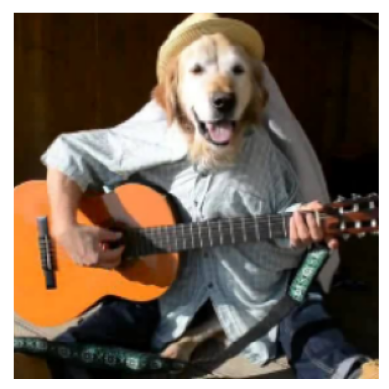

In [43]:
# display the image
plt.imshow(images[0] / 2 + 0.5)
plt.axis('off')
plt.show()

## Make some predictions

In [44]:
# decode the results into a list of tuples (class, description, probability)
preds = inception_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)
#probability

40960/35363 [==================================] - 0s 1us/step
('n02676566', 'acoustic_guitar', 0.4989618)
('n02099601', 'golden_retriever', 0.06709419)
('n03272010', 'electric_guitar', 0.030756947)
('n02099712', 'Labrador_retriever', 0.021906488)
('n03929660', 'pick', 0.009765844)


## Explicability with LIME image

In [51]:
# Train lime image explainer
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0].astype('double'), inception_model.predict, top_labels=5, hide_color=0, num_samples=1000)
#hide_color is the color for a superpixel turned OFF

  0%|          | 0/1000 [00:00<?, ?it/s]

In [46]:
# Plot boundaries
selected_label = 3
temp, mask = explanation.get_image_and_mask(explanation.top_labels[selected_label], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [47]:
# Plot boundaries on the full image
temp, mask = explanation.get_image_and_mask(explanation.top_labels[selected_label], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [48]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[selected_label]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# **SH**apley **A**dditive ex**P**lanations ([Lundberg et .al 2017](https://arxiv.org/abs/1905.04610))

## From Game Theory博弈论 Theorie de jeu


* In game theory, the [Shapley value](https://en.wikipedia.org/wiki/Shapley_value) (1953) is a solution concept of fairly distributing both gains and costs to several actors working in coalition.
* The Shapley value applies primarily in situations when the contributions of each actor are unequal, but they work in cooperation with each other to obtain the payoff.
* 在博弈论中，Shapley 值 (1953) 是一个将收益和成本公平分配给联合工作的几个参与者的解决方案概念。
* Shapley 值主要适用于每个参与者的贡献不平等的情况，但他们相互合作以获得回报。

You first start by identifying each player’s contribution when they play individually, when 2 play together, and when all 3 play together.

您首先要确定每个球员在单独比赛时、2 人一起比赛时以及所有 3 人一起比赛时的贡献。
<p align="center">
<img src=https://clearcode.cc/wp-content/uploads/2016/11/ABC-wide.png?ver=1478561348 width=500>
</p>

Then, you need to consider all possible orders and calculate their marginal value – e.g. what value does each player add when player A enters the game first, followed by player B, and then player C.
Below are the 6 possible orders and the marginal value each player adds in the different combinations:

然后，您需要考虑所有可能的订单并计算它们的边际价值——例如当玩家 A 首先进入游戏，然后是玩家 B，然后是玩家 C 时，每个玩家添加的价值是什么。 
以下是 6 种可能的顺序以及每个玩家在不同组合中添加的边际价值：
<p align="center">
<img src=https://clearcode.cc/wp-content/uploads/2016/11/ABC-updated.png?ver=1479258642 width=500>
</p>

Now that we have calculated each player’s marginal value across all 6 possible order combinations, we now need to add them up and work out the Shapley value (i.e. the average) for each player.

既然我们已经计算了所有 6 种可能的订单组合中每个玩家的边际值，我们现在需要将它们相加并计算出每个玩家的 Shapley 值（即平均值）。

<ins>Example for Player A:</ins>
$ \text{Shapley}_{value} = \frac{7+7+10+3+9+10}{6} \approx 7.7$

Computing the Shapley value for each player will give the true contribution each player made to the game and assign credit fairly

计算每个玩家的 Shapley 值将给出每个玩家对游戏的真实贡献并公平分配功劳

## To Explainability Method--可解释性方法

* Each value of an independent variable or a feature for a given sample is a part of a cooperative game where we assume that prediction is actually the payout.
* Shapley values correspond to the contribution of each feature towards pushing the prediction away from the expected value.
* 给定样本的自变量或特征的每个值都是合作游戏的一部分，我们假设预测实际上是支出。
* Shapley 值对应于每个特征对将预测推离预期值的贡献。

Let take an example of a local prediction of a house price and see how the different features are impacting the prediction. 

让我们举一个本地房价预测的例子，看看不同的特征如何影响预测。
<p align="center">
<img src=https://raw.githubusercontent.com/slundberg/shap/master/docs/artwork/boston_waterfall.png width=700>
</p>

Example of features definition: 
* LSTAT (% of lower status population)LSTAT（低地位人口的百分比）
* RM (average number of rooms per house in an area)RM（一个地区每间房子的平均房间数）
* NOX (nitric oxides concentration)NOX（一氧化氮浓度）
* RAD (index of accessibility to radial highways)RAD（径向公路可达性指数）
* For more information, link to [Boston dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) 



## Explanation of SHAP through visualization

### Global explainability & local explanation summary
<p align="center">
<img src=https://raw.githubusercontent.com/slundberg/shap/master/docs/artwork/boston_global_bar.png width=470>
<img src=https://raw.githubusercontent.com/slundberg/shap/master/docs/artwork/boston_beeswarm.png width=530>
</p>
impact positive/negative

### Local explainability and correlation
<p align="center">
<img src=https://raw.githubusercontent.com/slundberg/shap/master/docs/artwork/boston_scatter.png width=500>
</p>

## Advantages 好处
* SHAP has a solid theoretical foundation in game theory. The prediction is fairly distributed among the feature values. We get contrastive explanations that compare the prediction with the average prediction.
* **SHAP connects LIME and Shapley values**.
* SHAP has a **fast implementation** for **tree-based models**.
* When computation of the **many Shapley values is possible**, **global model interpretations** can be built. The global interpretation methods include feature importance, feature dependence, interactions, clustering and summary plots.

* SHAP在博弈论方面有扎实的理论基础。 预测在特征值之间公平分布。 我们得到对比解释，将预测与平均预测进行比较。
* SHAP 连接 LIME 和 Shapley 值。
* SHAP 可以快速实现基于树的模型。
* 当可以计算多个 Shapley 值时，可以构建全局模型解释。 全局解释方法包括特征重要性、特征依赖、相互作用、聚类和汇总图。

## Drawbacks缺点
* Slow computation if you want to compute Shapley values for many instances (except for tree-based models).
* The disadvantages of Shapley values also apply to SHAP: Shapley values can be misinterpreted.
* Since every model is trained from observational data, it is **not necessarily a causal model**.

* 如果您想为许多实例计算 Shapley 值（基于树的模型除外），则计算速度较慢。
* Shapley 值的缺点也适用于 SHAP：Shapley 值可能会被误解。
* 由于每个模型都是根据观察数据训练的，因此不一定是因果模型。

For more information on SHAP values see: https://github.com/slundberg/shap

## Practical exercise

Download the dataset from Kaggle ([link](https://www.kaggle.com/paololol/league-of-legends-ranked-matches))

The objective in a game of League of Legends is to destroy the enemy base, in a 5 vs. 5 match. Using datasets with statistics of the game and the players, the goal is to predict the probability to win the game. 


英雄联盟游戏的目标是在 5 对 5 的比赛中摧毁敌人的基地。 使用带有游戏和玩家统计数据的数据集，目标是预测赢得比赛的概率。

In [70]:
#! pip install shap

import pandas as pd
import numpy as np 
import xgboost as xgb
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

shap.initjs()

In [71]:
# read in the data
matches = pd.read_csv(PATH+"matches.csv")
participants = pd.read_csv(PATH+"participants.csv")
stats1 = pd.read_csv(PATH+"stats1.csv", low_memory=False)
stats2 = pd.read_csv(PATH+"stats2.csv", low_memory=False)
stats = pd.concat([stats1,stats2])

In [72]:
# merge into a single DataFrame
a = pd.merge(participants, matches, left_on="matchid", right_on="id")
allstats_orig = pd.merge(a, stats, left_on="matchid", right_on="id")
allstats = allstats_orig.copy()

# drop games that lasted less than 10 minutes
allstats = allstats.loc[allstats["duration"] >= 10*60,:]

# Convert string-based categories to numeric values
cat_cols = ["role", "position", "version", "platformid"]
for c in cat_cols:
    allstats[c] = allstats[c].astype('category')
    allstats[c] = allstats[c].cat.codes
allstats["wardsbought"] = allstats["wardsbought"].astype(np.int32)

# Reduce dataset size to accelerate training
allstats = allstats[allstats['matchid'] < 50000]

X = allstats.drop(["win"], axis=1)
y = allstats["win"]

In [73]:
# convert all features we want to consider as rates
rate_features = [
    "kills", "deaths", "assists", "killingsprees", "doublekills",
    "triplekills", "quadrakills", "pentakills", "legendarykills",
    "totdmgdealt", "magicdmgdealt", "physicaldmgdealt", "truedmgdealt",
    "totdmgtochamp", "magicdmgtochamp", "physdmgtochamp", "truedmgtochamp",
    "totheal", "totunitshealed", "dmgtoobj", "timecc", "totdmgtaken",
    "magicdmgtaken" , "physdmgtaken", "truedmgtaken", "goldearned", "goldspent",
    "totminionskilled", "neutralminionskilled", "ownjunglekills",
    "enemyjunglekills", "totcctimedealt", "pinksbought", "wardsbought",
    "wardsplaced", "wardskilled"
]
for feature_name in rate_features:
    X[feature_name] /= X["duration"] / 60 # per minute rate

# convert to fraction of game
X["longesttimespentliving"] /= X["duration"]

# define friendly names for the features
full_names = {
    "kills": "Kills per min.",
    "deaths": "Deaths per min.",
    "assists": "Assists per min.",
    "killingsprees": "Killing sprees per min.",
    "longesttimespentliving": "Longest time living as % of game",
    "doublekills": "Double kills per min.",
    "triplekills": "Triple kills per min.",
    "quadrakills": "Quadra kills per min.",
    "pentakills": "Penta kills per min.",
    "legendarykills": "Legendary kills per min.",
    "totdmgdealt": "Total damage dealt per min.",
    "magicdmgdealt": "Magic damage dealt per min.",
    "physicaldmgdealt": "Physical damage dealt per min.",
    "truedmgdealt": "True damage dealt per min.",
    "totdmgtochamp": "Total damage to champions per min.",
    "magicdmgtochamp": "Magic damage to champions per min.",
    "physdmgtochamp": "Physical damage to champions per min.",
    "truedmgtochamp": "True damage to champions per min.",
    "totheal": "Total healing per min.",
    "totunitshealed": "Total units healed per min.",
    "dmgtoobj": "Damage to objects per min.",
    "timecc": "Time spent with crown control per min.",
    "totdmgtaken": "Total damage taken per min.",
    "magicdmgtaken": "Magic damage taken per min.",
    "physdmgtaken": "Physical damage taken per min.",
    "truedmgtaken": "True damage taken per min.",
    "goldearned": "Gold earned per min.",
    "goldspent": "Gold spent per min.",
    "totminionskilled": "Total minions killed per min.",
    "neutralminionskilled": "Neutral minions killed per min.",
    "ownjunglekills": "Own jungle kills per min.",
    "enemyjunglekills": "Enemy jungle kills per min.",
    "totcctimedealt": "Total crown control time dealt per min.",
    "pinksbought": "Pink wards bought per min.",
    "wardsbought": "Wards bought per min.",
    "wardsplaced": "Wards placed per min.",
    "turretkills": "# of turret kills",
    "inhibkills": "# of inhibitor kills",
    "dmgtoturrets": "Damage to turrets"
}
feature_names = [full_names.get(n, n) for n in X.columns]
X.columns = feature_names

In [55]:
# create train/validation split
Xt, Xv, yt, yv = train_test_split(X,y, test_size=0.2, random_state=10)
dt = xgb.DMatrix(Xt, label=yt.values)
dv = xgb.DMatrix(Xv, label=yv.values)

In [60]:
# We want to solve a logistic regression with a logloss evaluation
params = {
    "eta": 0.5,
    "max_depth": 4,
    "objective": "binary:logistic",
    "silent": 1,
    "base_score": np.mean(yt),
    "eval_metric": "logloss"
}
# Code the training part for 300 iterations with early stopping rounds at 5 and a verbose eval at 25
model = xgb.train(params, dt, 300, [(dt, "train"),(dv, "valid")], early_stopping_rounds=5, verbose_eval=25)



[16:47:01] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.54176	valid-logloss:0.54174
[25]	train-logloss:0.28133	valid-logloss:0.28552
[50]	train-logloss:0.23592	valid-logloss:0.24161
[75]	train-logloss:0.20891	valid-logloss:0.21644
[100]	train-logloss:0.18816	valid-logloss:0.19712
[125]	train-logloss:0.17237	valid-logloss:0.18185
[150]	train-logloss:0.15796	valid-logloss:0.16783
[175]	train-logloss:0.14395	valid-logloss:0.15466
[200]	train-logloss:0.13287	valid-logloss:0.14380
[225]	train-logloss:0.12303	valid-logloss:0.13365
[250]	train-logloss:0.11320	valid-logloss:0.12410
[275]	train-logloss:0.10343	valid-logloss:0.11408
[299]	train-logloss:0.09594	valid-logloss:0.10639


In [61]:
#练习题
# compute the SHAP values for every prediction in the validation dataset
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xv)


In [62]:
# Force plot example for a record
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], Xv.iloc[0,:])

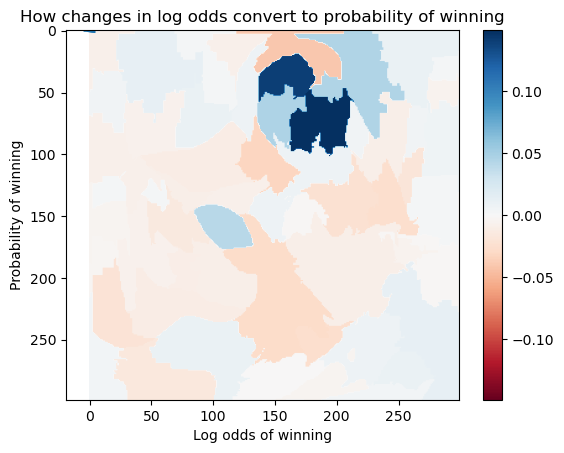

In [63]:
xs = np.linspace(-4,4,100)
plt.xlabel("Log odds of winning")
plt.ylabel("Probability of winning")
plt.title("How changes in log odds convert to probability of winning")
plt.plot(xs, 1/(1+np.exp(-xs)))
plt.show()

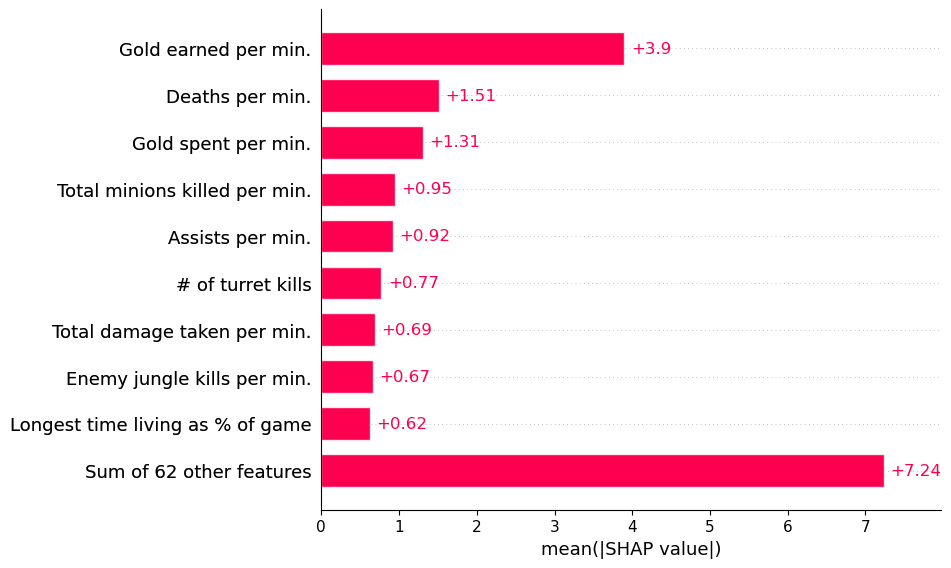

In [64]:
# Global explainability
shap.plots.bar(explainer(Xv))

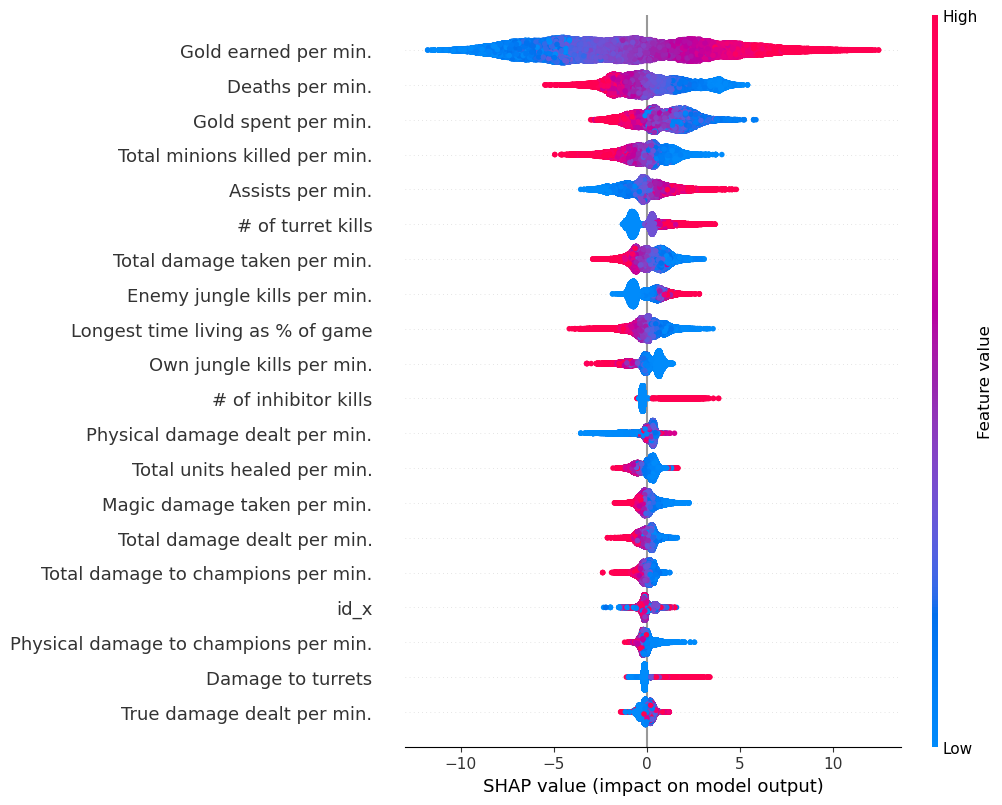

In [65]:
# Local explanation summary
shap.summary_plot(shap_values, Xv)

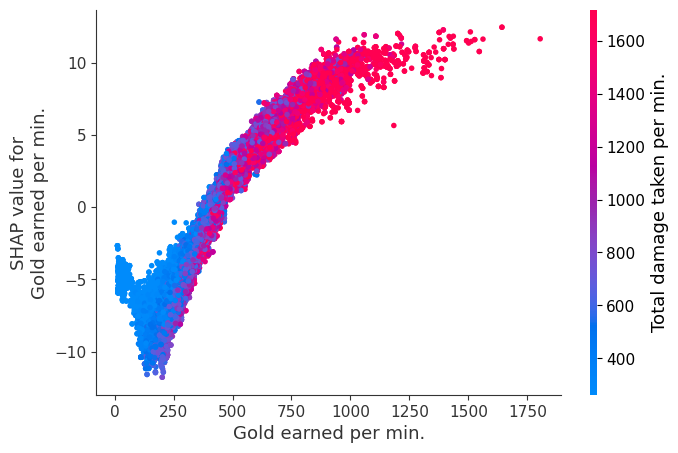

In [66]:
# Dependence plot between variables (automatic)
shap.dependence_plot("Gold earned per min.", shap_values, Xv)

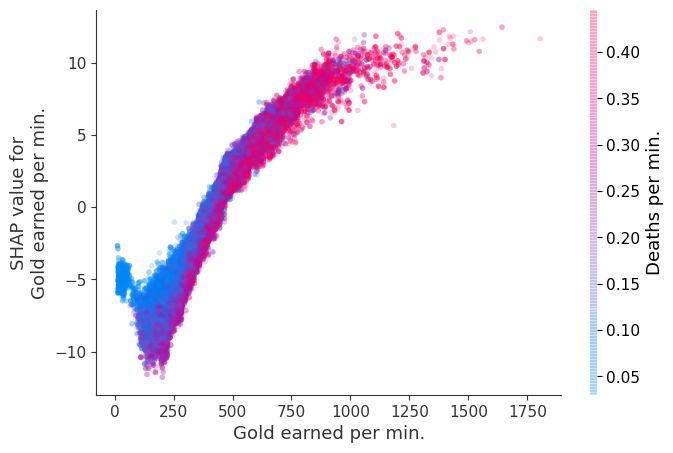

In [67]:
# Dependence plot between variables (assigned)
shap.dependence_plot("Gold earned per min.", shap_values, Xv, alpha=0.2, interaction_index="Deaths per min.")

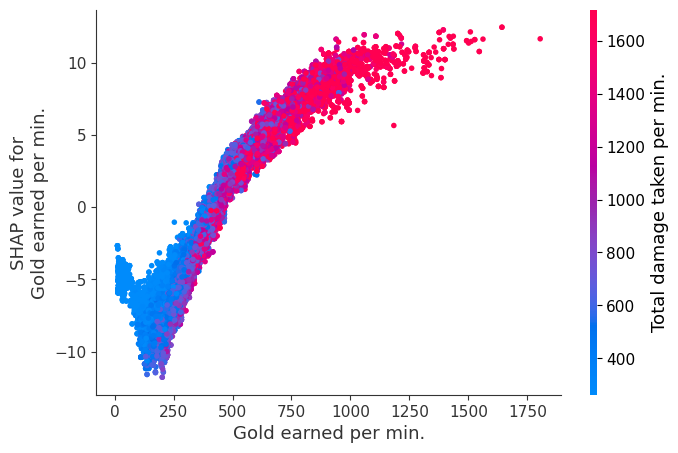

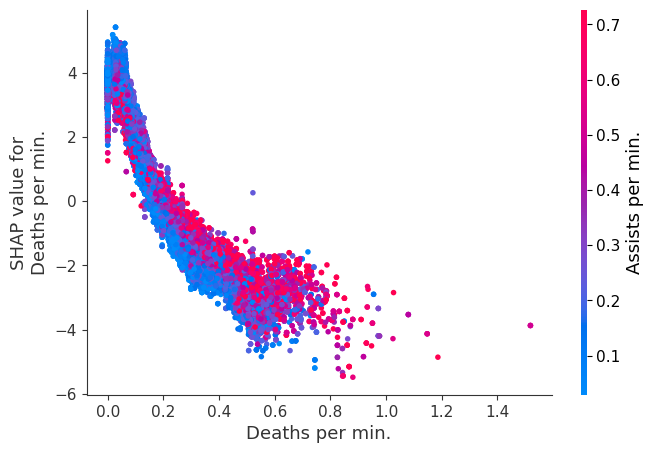

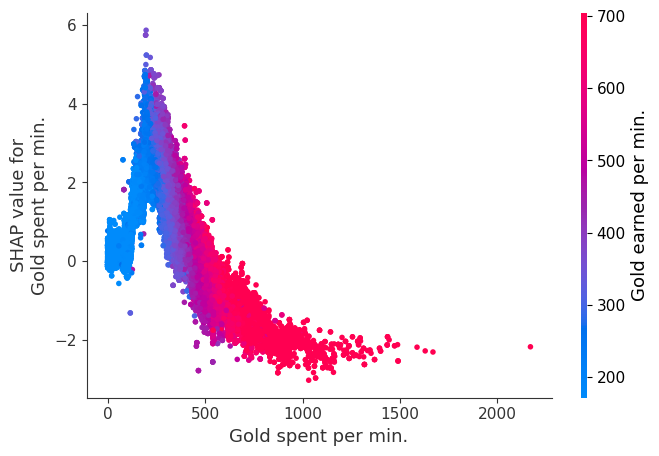

In [68]:
# sort the features indexes by their importance in the model
# (sum of SHAP value magnitudes over the validation dataset)
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# make SHAP plots of the three most important features
for i in range(3):
    shap.dependence_plot(top_inds[i], shap_values, Xv)

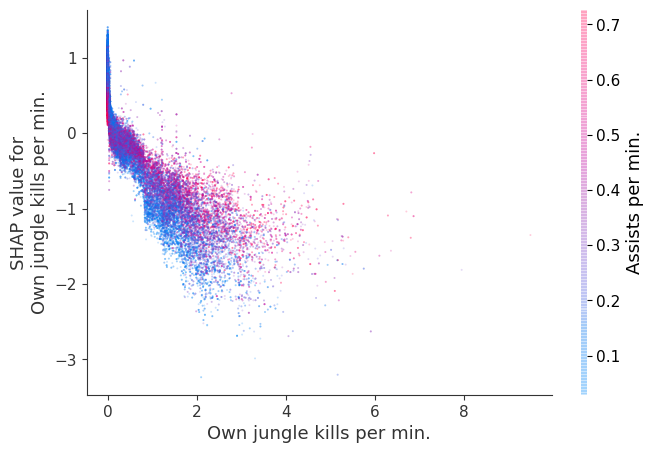

In [74]:
# Play with plot variables
shap.dependence_plot(top_inds[9], shap_values, Xv, x_jitter=0.5, alpha=0.2, dot_size=2)